In [1]:
%matplotlib inline
import geopandas as gpd
from shapely.geometry import Point
import random # library for random number generation
import numpy as np # library for vectorized computation
import pandas as pd # library to process data as dataframes
import pandas_bokeh
import matplotlib.pyplot as plt # plotting library
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs
from bokeh.models.widgets import Panel, Tabs
from bokeh.io import output_file, show
from bokeh.plotting import figure
from bokeh.layouts import layout

print('Libraries imported.')

Libraries imported.


In [2]:
# set the filepath and load in a shapefile
ct="/Users/lirui/Desktop/ReginaOutputs/CT_Stats.shp"
db="/Users/lirui/Desktop/ReginaOutputs/DB_Stats.shp"
gd="/Users/lirui/Desktop/ReginaOutputs/GRID_Stats.shp"

In [11]:
# transfer the shapefiles into geographic dataframes
df_ct = gpd.read_file(ct).drop(['PRNAME','CMANAME','CMATYPE','area', 'BldgArea', 'BldgCount', 'ContCount'], axis=1)
df_db = gpd.read_file(db).drop(['PRNAME','CMANAME','CMATYPE','area', 'BldgArea', 'BldgCount', 'ContCount'], axis=1)
df_grid = gpd.read_file(gd).drop(['area', 'BldgArea', 'BldgCount', 'ContCount'], axis=1)


# 1 Non-interactive visualization
## Building coverage ratio (BCR)

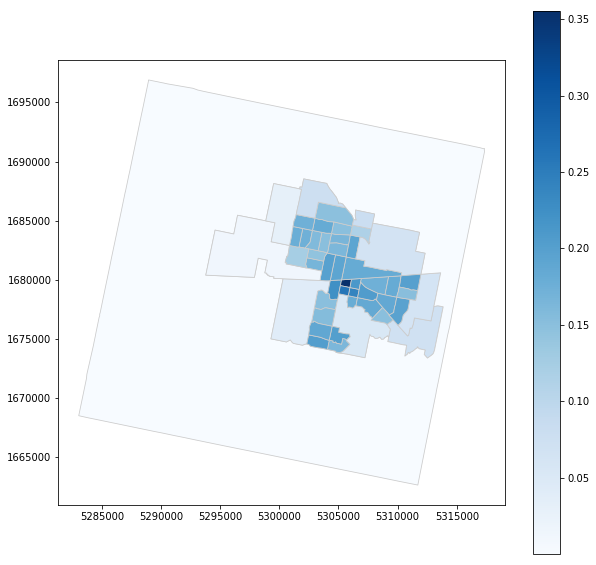

In [4]:
df_ct.plot(figsize= (10, 10), column="BCR", cmap='Blues', linewidth=0.8,  edgecolor='0.8', legend=True)
plt.savefig('Building Coverage Ratio.png')

## Building density (BD)

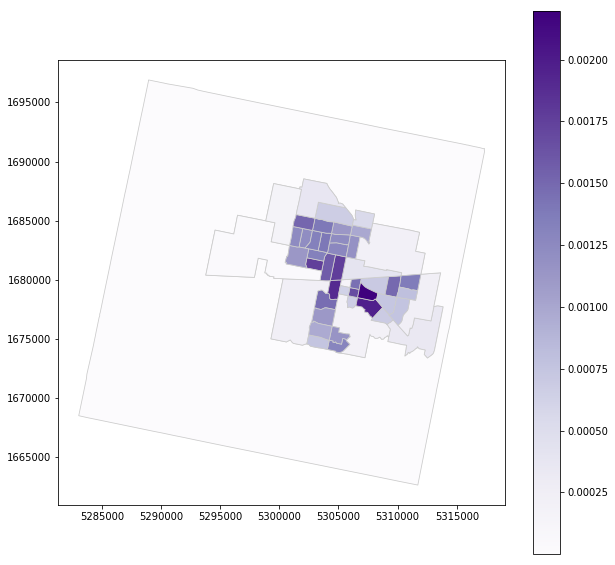

In [5]:
df_ct.plot(figsize= (10, 10), column="BD", cmap='Purples', linewidth=0.8,  edgecolor='0.8', legend=True)
plt.savefig('Building Density.png')

## Proximity

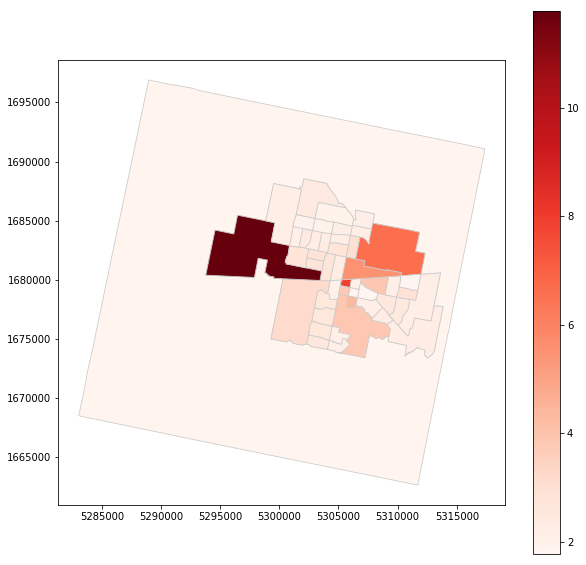

In [6]:
df_ct.plot(figsize= (10, 10), column="ProxMean", cmap='Reds', linewidth=0.8,  edgecolor='0.8', legend=True)
plt.savefig('Proximity.png')

## Size

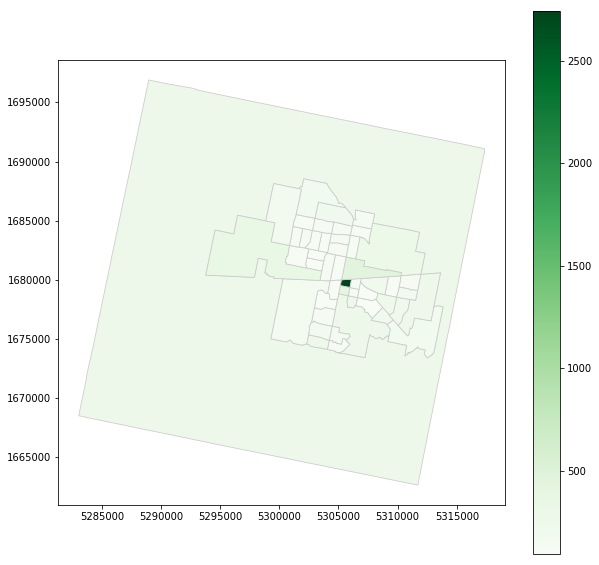

In [7]:
df_ct.plot(figsize= (10, 10), column="AvgSize", cmap='Greens', linewidth=0.8,  edgecolor='0.8',legend=True)
plt.savefig('Average Size.png')

## Contiguity

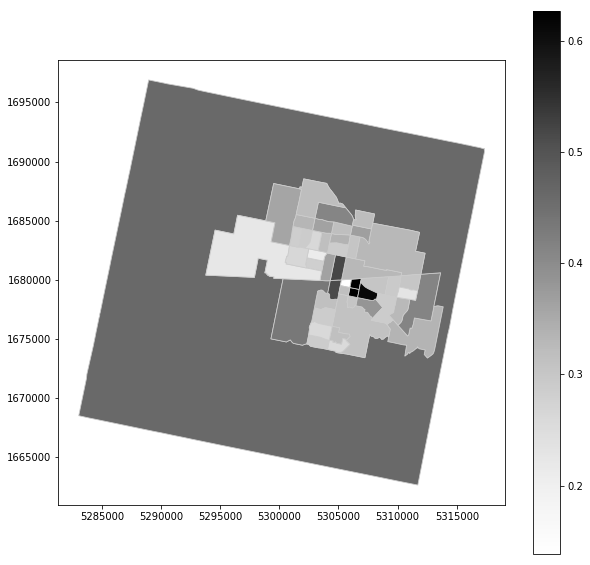

In [8]:
df_ct.plot(figsize= (10, 10), column="ContRatio", cmap='Greys', linewidth=0.8,  edgecolor='0.8',legend=True)
plt.savefig('Contiguity Ratio.png')

# Interactive Dashboard

In [9]:
pandas_bokeh.output_file("5 Statistics Visualization.html")

## Building Coverage Ratio for 3 Geo-units

In [12]:
#figure of census tract
figure1 = df_ct.plot_bokeh(
    figsize=(800, 800),
    show_figure=False,
    category="BCR",
    colormap="RdBu",
    legend="Census Tract",
    show_colorbar=False,
)

#figure of dessimination block
figure2 = df_db.plot_bokeh(
    show_figure=False,
    figure=figure1,         
    category="BCR",
    colormap="RdBu",
    legend="Dessimination Block",
    show_colorbar=False,
)

#figure of grid 1 km^2
BCR=df_grid.plot_bokeh(
    show_figure=False,
    figure=figure2,         
    category="BCR",
    colormap="RdBu",
    legend="Grid 1km^2",
)

## Building Density for 3 Geo-units

In [13]:
#figure of census tract
figure3 = df_ct.plot_bokeh(
    figsize=(800, 800),
    show_figure=False,
    category="BD",
    colormap="RdBu",
    legend="Census Tract",
    show_colorbar=False,
)

#figure of dessimination block
figure4 = df_db.plot_bokeh(
    show_figure=False,
    figure=figure3,       
    category="BD",
    colormap="RdBu",
    legend="Dessimination Block",
    show_colorbar=False,
)

#figure of grid 1 km^2
BD=df_grid.plot_bokeh(
    show_figure=False,
    figure=figure4,       
    category="BD",
    colormap="RdBu",
    legend="Grid 1km^2",
)

## Proximity for 3 Geo-units

In [14]:
#figure of census tract
figure5 = df_ct.plot_bokeh(
    figsize=(800, 800),
    show_figure=False,
    category="ProxMean",
    colormap="RdBu",
    legend="Census Tract",
    show_colorbar=False,
)

#figure of dessimination block
figure6 = df_db.plot_bokeh(
    show_figure=False,
    figure=figure5,        
    category="ProxMean",
    colormap="RdBu",
    legend="Dessimination Block",
    show_colorbar=False,
)

#figure of grid 1 km^2
P=df_grid.plot_bokeh(
    show_figure=False,
    figure=figure6,         # <== pass figure here!
    category="ProxMean",
    colormap="RdBu",
    legend="Grid 1km^2",
    title="Proximity"
)

## Average Size for 3 Geo-units

In [15]:
#figure of census tract
figure7 = df_ct.plot_bokeh(
    figsize=(800, 800),
    show_figure=False,
    category="AvgSize",
    colormap="RdBu",
    legend="Census Tract",
    show_colorbar=False,
)

#figure of dessimination block
figure8 = df_db.plot_bokeh(
    show_figure=False,
    figure=figure7,      
    category="AvgSize",
    colormap="RdBu",
    legend="Dessimination Block",
    show_colorbar=False,
)

#figure of grid 1 km^2
S=df_grid.plot_bokeh(
    show_figure=False,
    figure=figure8,         # <== pass figure here!
    category="AvgSize",
    colormap="RdBu",
    legend="Grid 1km^2",
)

## Contiguity Ratio for 3 Geo-units

In [16]:
#figure of census tract
figure9 = df_ct.plot_bokeh(
    figsize=(800, 800),
    show_figure=False,
    category="ContRatio",
    colormap="RdBu",
    legend="Census Tract",
    show_colorbar=False,
)

#figure of dessimination block
figure10 = df_db.plot_bokeh(
    show_figure=False,
    figure=figure9,         
    category="ContRatio",
    colormap="RdBu",
    legend="Dessimination Block",
    show_colorbar=False,
)

#figure of grid 1 km^2
C=df_grid.plot_bokeh(
    figure=figure10,         # <== pass figure here!
    category="ContRatio",
    show_figure=False,
    colormap="RdBu",
    legend="Grid 1km^2",
)

## Integrated Dashboard

In [17]:
tab1 = Panel(child=BCR, title="Building Coverage Ratio")
tab2 = Panel(child=BD, title="Buliding Density")
tab3 = Panel(child=P, title="Proximity")
tab4 = Panel(child=S, title="Size")
tab5 = Panel(child=C, title="Contiguity")
tabs = Tabs(tabs=[ tab1, tab2, tab3, tab4, tab5 ])

In [18]:
show(tabs)